# 📊 **Regresión Logística** 🔄📉

**La regresión logística** es un algoritmo de aprendizaje supervisado para **clasificación** (binaria o multiclase). Usa una función sigmoide para predecir probabilidades entre 0 y 1.  

## 🔍 Fórmula Básica:
$$
P(y=1) = \frac{1}{1+e^{-(\beta_0+\beta_1 X)}}
$$


## 💡 Características Clave:
- **Tipo**: Clasificación (no regresión, a pesar del nombre).  
- **Función**: Sigmoide ("S" curva).  
- **Salida**: Probabilidad (0 a 1).  
- **Umbral**: Típicamente 0.5 para decidir la clase.  

## 📌 Usos Comunes:
- Diagnóstico médico (✅ enfermo / ❌ sano).  
- Detección de spam (✅ spam / ❌ no spam).  
- Scoring crediticio (✅ aprueba / ❌ rechaza).  

## ⚠️ Limitaciones:
- Requiere relación lineal entre features y log-odds.  
- Sensible a outliers.  

¡Simple pero poderosa para problemas separables linealmente! �✨

## 📥 **Paso 1: Importar librerías** 🧰🔧

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 🚛 **Paso 2: Carga del Dataset** 📦🔢

In [6]:
df = pd.read_csv("/content/drive/MyDrive/TEC/EJ2025/Taller Machine Learning/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
#Overview del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#Checar si hay valores nulos
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
#Descripción del dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


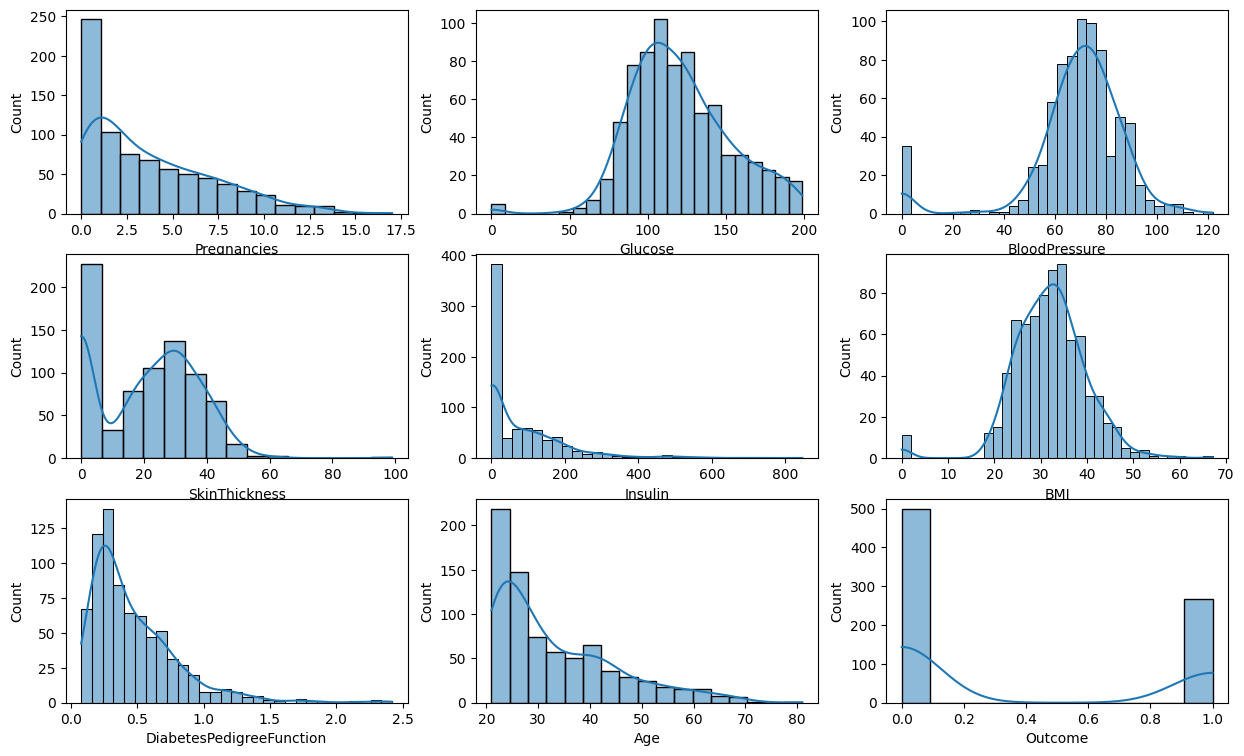

In [12]:
#Distribución de los datos
fig, ax = plt.subplots(3,3,figsize=(15,9))
for i, col in enumerate(df):
    sns.histplot(df[col], kde=True, ax=ax[i//3, i%3])
plt.show()

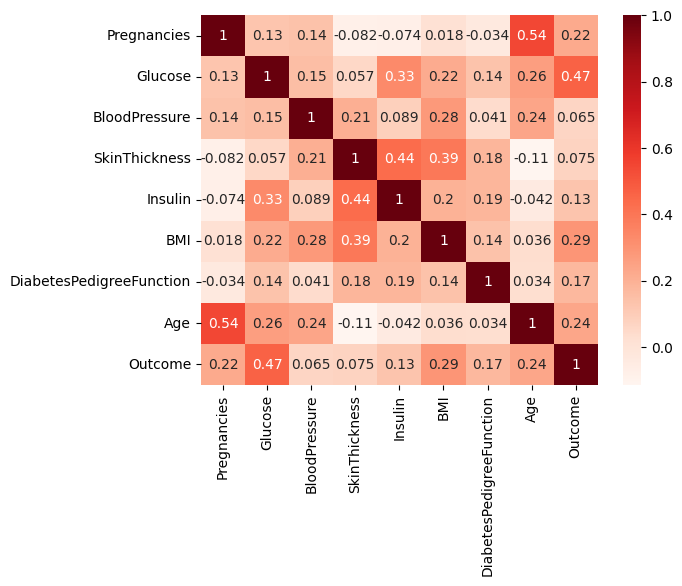

In [29]:
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.show()

## 🔍 **Paso 3: Selección de variables descriptoras** 📌📊

In [15]:
y = df['Outcome'] # Target
X = df.drop('Outcome', axis=1) # Variables descriptores

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [18]:
#Modelo y entrenamiento
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
#Predicción
y_pred = logreg.predict(X_test)

## 📊 **Paso 4: Evaluación del Modelo** 🧪🔍

### Métricas clave:
- ✅ **Exactitud (Accuracy)**: `(TP + TN) / Total`
- 🎯 **Precisión (Precision)**: `TP / (TP + FP)`
- 🔍 **Sensibilidad (Recall)**: `TP / (TP + FN)`
- ⚖️ **F1-Score**: Balance entre precisión y recall
- 📈 **Matriz de Confusión**: Visualización de resultados

In [20]:
#Matriz de confusión
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]])

Text(0.5, 427.9555555555555, 'Predicted label')

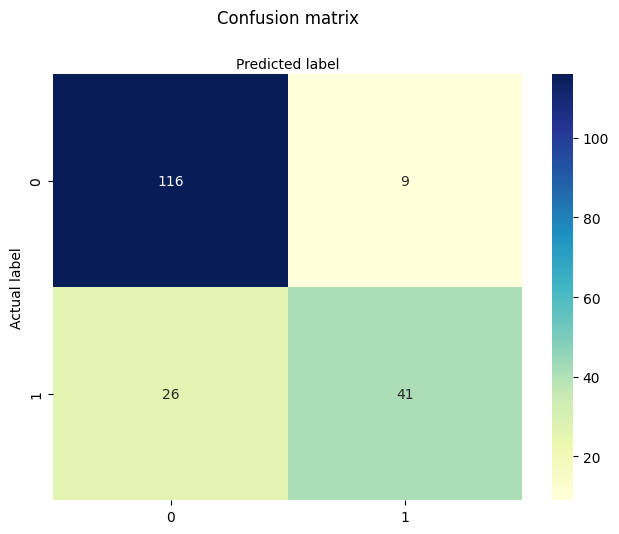

In [25]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [26]:
#Classification Report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



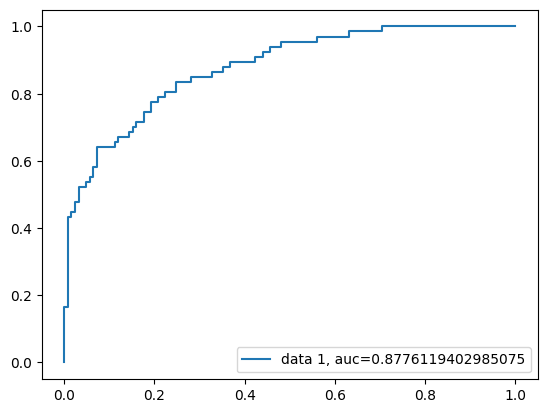

In [27]:
#Curva ROC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## 🔮 **Paso 5: Predicción con datos nuevos** ✨📤

In [30]:
def predict_new_data(model, new_data):
  """
  Genera una predicción utilizando un modelo entrenado y nuevos datos de entrada.

  Args:
    model: El modelo entrenado (ej. logreg de LogisticRegression).
    new_data: Un DataFrame de pandas o arreglo numpy con los nuevos datos
              de entrada. Debe tener las mismas columnas (o características)
              que los datos de entrenamiento (X).

  Returns:
    Un arreglo numpy con las predicciones para los nuevos datos.
  """
  prediction = model.predict(new_data)
  return prediction

In [31]:
new_patient_df = pd.DataFrame([[6, 148, 72, 35, 0, 33.6, 0.627, 50]],
                              columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                                       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [32]:
# Realizar la predicción
new_prediction = predict_new_data(logreg, new_patient_df)

# Imprimir el resultado de la predicción
print(f"Predicción para los nuevos datos: {new_prediction}")

# Puedes interpretar el resultado: 0 = sin diabetes, 1 = con diabetes
if new_prediction[0] == 1:
  print("Según el modelo, es probable que este paciente tenga diabetes.")
else:
  print("Según el modelo, es probable que este paciente no tenga diabetes.")

# Para obtener la probabilidad de la predicción:
new_prediction_proba = logreg.predict_proba(new_patient_df)
print(f"Probabilidad de la predicción (sin diabetes, con diabetes): {new_prediction_proba}")

# La probabilidad de tener diabetes es el segundo elemento
print(f"Probabilidad de tener diabetes: {new_prediction_proba[0][1]:.4f}")

Predicción para los nuevos datos: [1]
Según el modelo, es probable que este paciente tenga diabetes.
Probabilidad de la predicción (sin diabetes, con diabetes): [[0.29257121 0.70742879]]
Probabilidad de tener diabetes: 0.7074
